# Importing libraries & Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# or use - from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




#references
#https://www.simplilearn.com/tutorials/python-tutorial/matplotlib

# Loading the Data

In [3]:
#importing our stock data of NIFTY50 from 28-11-12 to 28-11-22

nifty50 = pd.read_csv(r'/kaggle/input/nse-stock-price-data-28-11-12-to-28-11-22/NSE.csv')

nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-29,5736.700195,5833.500000,5736.100098,5825.000000,5825.000000,0.0
1,2012-11-30,5836.000000,5885.250000,5827.850098,5879.850098,5879.850098,0.0
2,2012-12-03,5878.250000,5899.149902,5854.600098,5870.950195,5870.950195,0.0
3,2012-12-04,5866.799805,5894.950195,5859.000000,5889.250000,5889.250000,0.0
4,2012-12-05,5906.600098,5917.799805,5891.350098,5900.500000,5900.500000,0.0


In [4]:
nifty50.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2462,2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800.0
2463,2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0
2464,2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0
2465,2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0
2466,2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0


# Data Preprocessing

In [5]:
#Dropping the rows which has null values

nifty50.dropna(inplace=True)
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2452 non-null   object 
 1   Open       2452 non-null   float64
 2   High       2452 non-null   float64
 3   Low        2452 non-null   float64
 4   Close      2452 non-null   float64
 5   Adj Close  2452 non-null   float64
 6   Volume     2452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 153.2+ KB


In [6]:
# Also, the Volume column says no null values, but a quick look will tell that missing volume data is marked as 0.0
# So, we'll delete the rows with limited columns

nifty50 = nifty50[nifty50['Volume'] != 0.0]
nifty50 = nifty50.reset_index(drop=True)  # Reset the index
nifty50.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0
1,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0
2,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0
3,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0
4,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0
5,2013-01-28,6082.100098,6088.399902,6061.399902,6074.799805,6074.799805,113100.0
6,2013-01-29,6064.700195,6111.799805,6042.450195,6049.899902,6049.899902,157600.0
7,2013-01-30,6065.000000,6071.950195,6044.149902,6055.750000,6055.750000,124200.0
8,2013-01-31,6045.649902,6058.049805,6025.149902,6034.750000,6034.750000,168500.0
9,2013-02-01,6040.950195,6052.950195,5983.200195,5998.899902,5998.899902,159300.0


In [7]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2396 non-null   object 
 1   Open       2396 non-null   float64
 2   High       2396 non-null   float64
 3   Low        2396 non-null   float64
 4   Close      2396 non-null   float64
 5   Adj Close  2396 non-null   float64
 6   Volume     2396 non-null   float64
dtypes: float64(6), object(1)
memory usage: 131.2+ KB


# Data Visualization

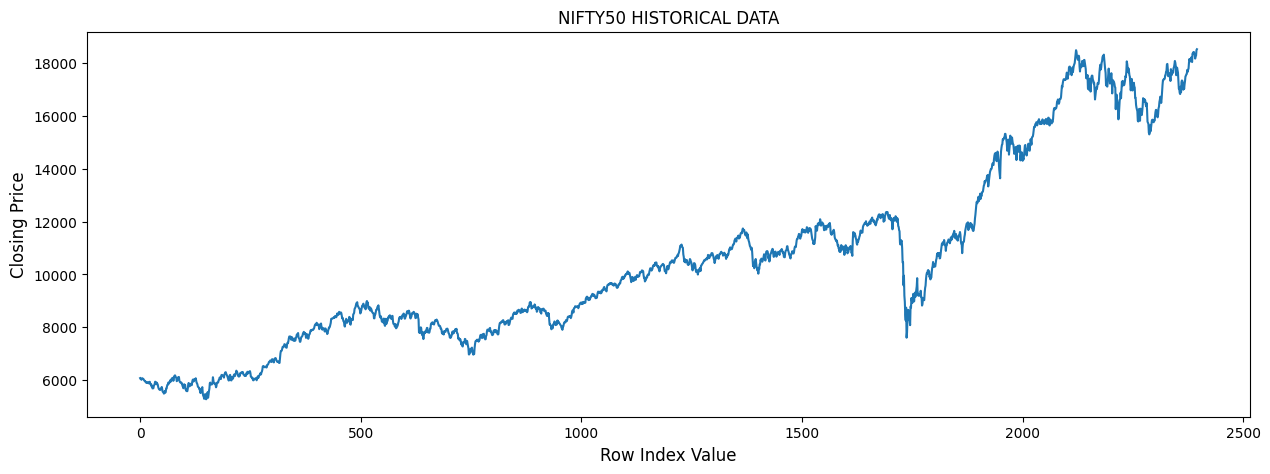

In [8]:
#pyplot is a module of matplotlib

#Plotting the close price in line chart

#The following plots can also be made from scratch using plt.figure method

#Data visualization is required so that we can infer trends and certain repeating patterns which will be helpful

plt.figure(figsize=(15,5))
plt.plot(nifty50['Close'])
plt.title('NIFTY50 HISTORICAL DATA', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xlabel('Row Index Value', fontsize=12)
plt.show()


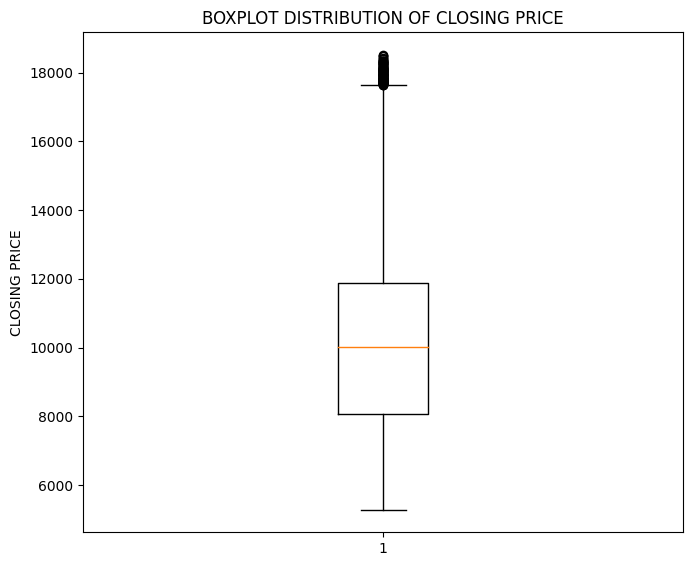

In [9]:
#Creating empty canvas
fig = plt.figure(figsize=[6,5])

#Setting Axes [Left,Bottom, Width, height]v
ax = fig.add_axes([0,0,1,1]) 

#Setting Titles
ax.set_title('BOXPLOT DISTRIBUTION OF CLOSING PRICE')
ax.set_ylabel('CLOSING PRICE')

#Calling Boxplot
ax.boxplot(nifty50['Close'])
fig.show()

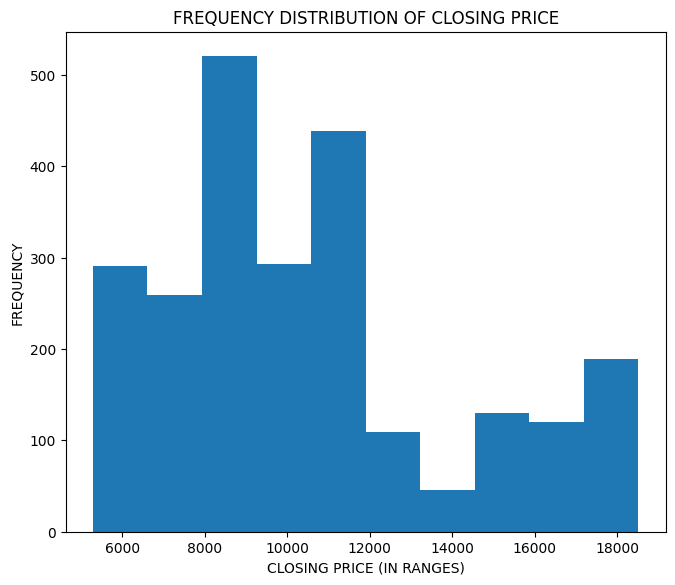

In [10]:
#Creating empty canvas
fig2 = plt.figure(figsize=[6,5])

#Setting Axes [Left,Bottom, Width, height]
ax2 = fig2.add_axes([0,0,1,1]) 

#Setting Titles
ax2.set_title('FREQUENCY DISTRIBUTION OF CLOSING PRICE')
ax2.set_xlabel('CLOSING PRICE (IN RANGES)')
ax2.set_ylabel('FREQUENCY')

#Calling Boxplot
ax2.hist(nifty50['Close'])
fig2.show()

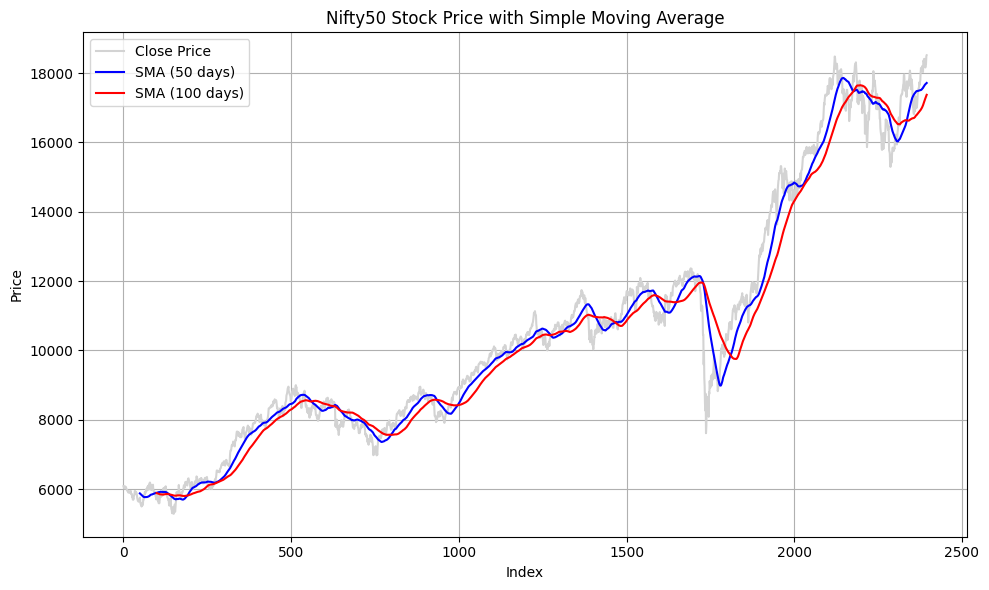

In [11]:
# Moving Averages (SMA)

# Calculate a simple moving average (SMA) with a window of 50 & 100 days
sma_window1=50
sma_window2=100
nifty50['SMA_50'] = nifty50['Close'].rolling(window=sma_window1).mean()
nifty50['SMA_100'] = nifty50['Close'].rolling(window=sma_window2).mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(nifty50.index, nifty50['Close'], label='Close Price', c='lightgray')
plt.plot(nifty50.index, nifty50['SMA_50'], label=f'SMA ({sma_window1} days)', c='blue')
plt.plot(nifty50.index, nifty50['SMA_100'], label=f'SMA ({sma_window2} days)', c='red')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Nifty50 Stock Price with Simple Moving Average')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The 50 MA is faster MA & 100 MA is slower MA. Traders have buy position whenever the faster MA (blue) is above the slower MA (red). This is good if the stock is at a trend and not sideways. The 50 & 100 combo is for trade lasting for months, similar.
The nifty50.index tells that the plot is against the index values.

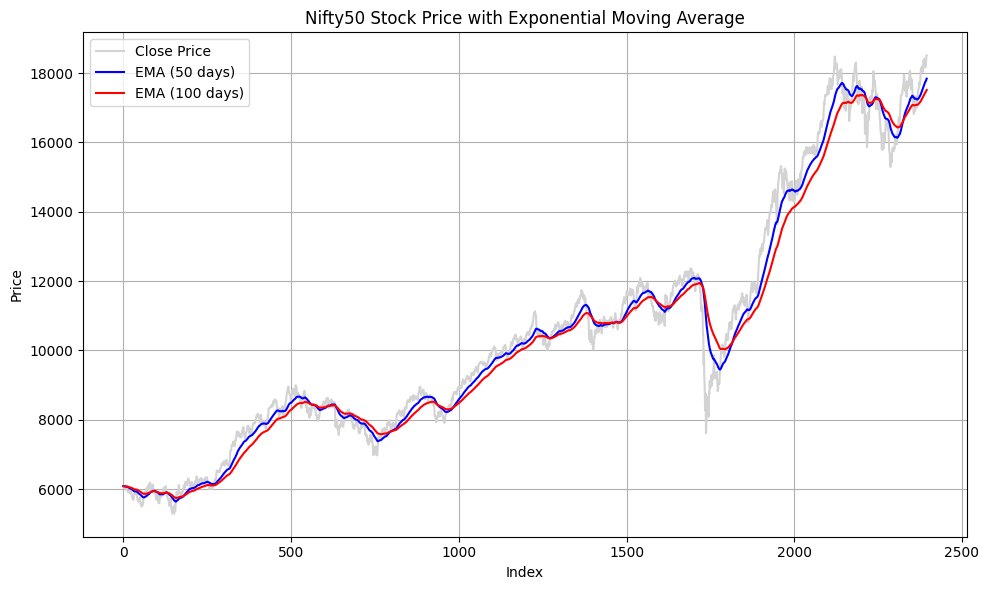

In [12]:
# Exponential Moving Averages
span1=50
span2=100

nifty50['EMA_50'] = nifty50['Close'].ewm(span=span1, adjust=False).mean()
nifty50['EMA_100'] = nifty50['Close'].ewm(span=span2, adjust=False).mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(nifty50.index, nifty50['Close'], label='Close Price', c='lightgray')
plt.plot(nifty50.index, nifty50['EMA_50'], label=f'EMA ({span1} days)', c='blue')
plt.plot(nifty50.index, nifty50['EMA_100'], label=f'EMA ({span2} days)', c='red')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Nifty50 Stock Price with Exponential Moving Average')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

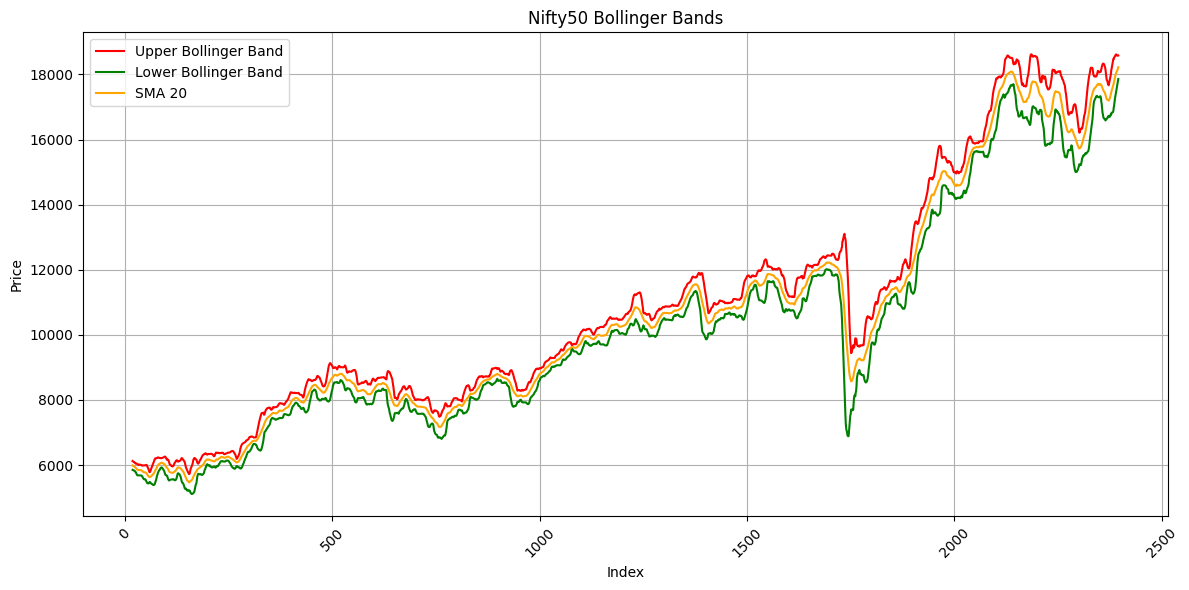

In [13]:

# Calculate the 20-day Simple Moving Average (SMA)
nifty50['SMA_20'] = nifty50['Close'].rolling(window=20).mean()

# Calculate the 20-day standard deviation
nifty50['std_20'] = nifty50['Close'].rolling(window=20).std()

# Calculate the upper Bollinger Band (SMA + 2 * std)
nifty50['Upper_Band'] = nifty50['SMA_20'] + (nifty50['std_20'] * 2)

# Calculate the lower Bollinger Band (SMA - 2 * std)
nifty50['Lower_Band'] = nifty50['SMA_20'] - (nifty50['std_20'] * 2)

# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.title('Nifty50 Bollinger Bands')
plt.xlabel('Index')
plt.ylabel('Price')


# Plot Bollinger Bands
plt.plot(nifty50.index, nifty50['Upper_Band'], label='Upper Bollinger Band', color='red')
plt.plot(nifty50.index, nifty50['Lower_Band'], label='Lower Bollinger Band', color='green')

# Plot SMA
plt.plot(nifty50.index, nifty50['SMA_20'], label='SMA 20', color='orange')

# Customize the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Bollinger bands predict the trend and suggest entry & exit points. The S.D returns the volatility from historical average (MA). 
1. Potential entry/exit points are,
When the price is near to lower Bollinger band, wait for increase and if it does then enter.
The exit can be done once it crosses the SMA, or once it cross the upper band.

2. The trend is important, if entry & exit done in downtrend, even with following point no.1 can be better.
So take entry points at an uptrend 

# Feature Engineering & Data Visualization

In [14]:
#Quarterly analysis

#Creating Day, Month & Year columns from Date Column
date = pd.DatetimeIndex(nifty50['Date'])
nifty50['Year'] = date.year
nifty50['Month'] = date.month
nifty50['Day'] = date.day

nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_100,EMA_50,EMA_100,SMA_20,std_20,Upper_Band,Lower_Band,Year,Month,Day
0,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0,NaN,NaN,6082.299805,6082.299805,NaN,NaN,NaN,NaN,2013,1,21
1,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0,NaN,NaN,6080.974322,6081.630502,NaN,NaN,NaN,NaN,2013,1,22
2,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0,NaN,NaN,6079.928263,6081.089300,NaN,NaN,NaN,NaN,2013,1,23
3,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0,NaN,NaN,6077.552649,6079.866742,NaN,NaN,NaN,NaN,2013,1,24
4,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0,NaN,NaN,6077.438815,6079.763438,NaN,NaN,NaN,NaN,2013,1,25


In [15]:
nifty50['Quarter End'] = np.where(nifty50['Month'] % 3 == 0,1,0)

nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_100,EMA_50,EMA_100,SMA_20,std_20,Upper_Band,Lower_Band,Year,Month,Day,Quarter End
0,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0,NaN,NaN,6082.299805,6082.299805,NaN,NaN,NaN,NaN,2013,1,21,0
1,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0,NaN,NaN,6080.974322,6081.630502,NaN,NaN,NaN,NaN,2013,1,22,0
2,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0,NaN,NaN,6079.928263,6081.089300,NaN,NaN,NaN,NaN,2013,1,23,0
3,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0,NaN,NaN,6077.552649,6079.866742,NaN,NaN,NaN,NaN,2013,1,24,0
4,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0,NaN,NaN,6077.438815,6079.763438,NaN,NaN,NaN,NaN,2013,1,25,0


In [16]:
# Select only the OHLC columns
ohlc_columns = ['Open', 'High', 'Low', 'Close' ,'Volume']

# Calculate the mean of OHLC values based on quarter end
ohlc_mean_by_quarter = nifty50[ohlc_columns].groupby(nifty50['Quarter End']).median()
# Median is less sensitive to outliers

ohlc_mean_by_quarter

,Open,High,Low,Close,Volume
Quarter End,,,,,
0,10111.699707,10133.349609,10050.274902,10105.525391,230150.0
1,9952.250000,9999.824707,9871.774903,9943.500000,225450.0


We can see the dip in price & volume traded at quarter end months, this could mean some news. Sentiment analysis on those months for nifty50 could reveal the cause.

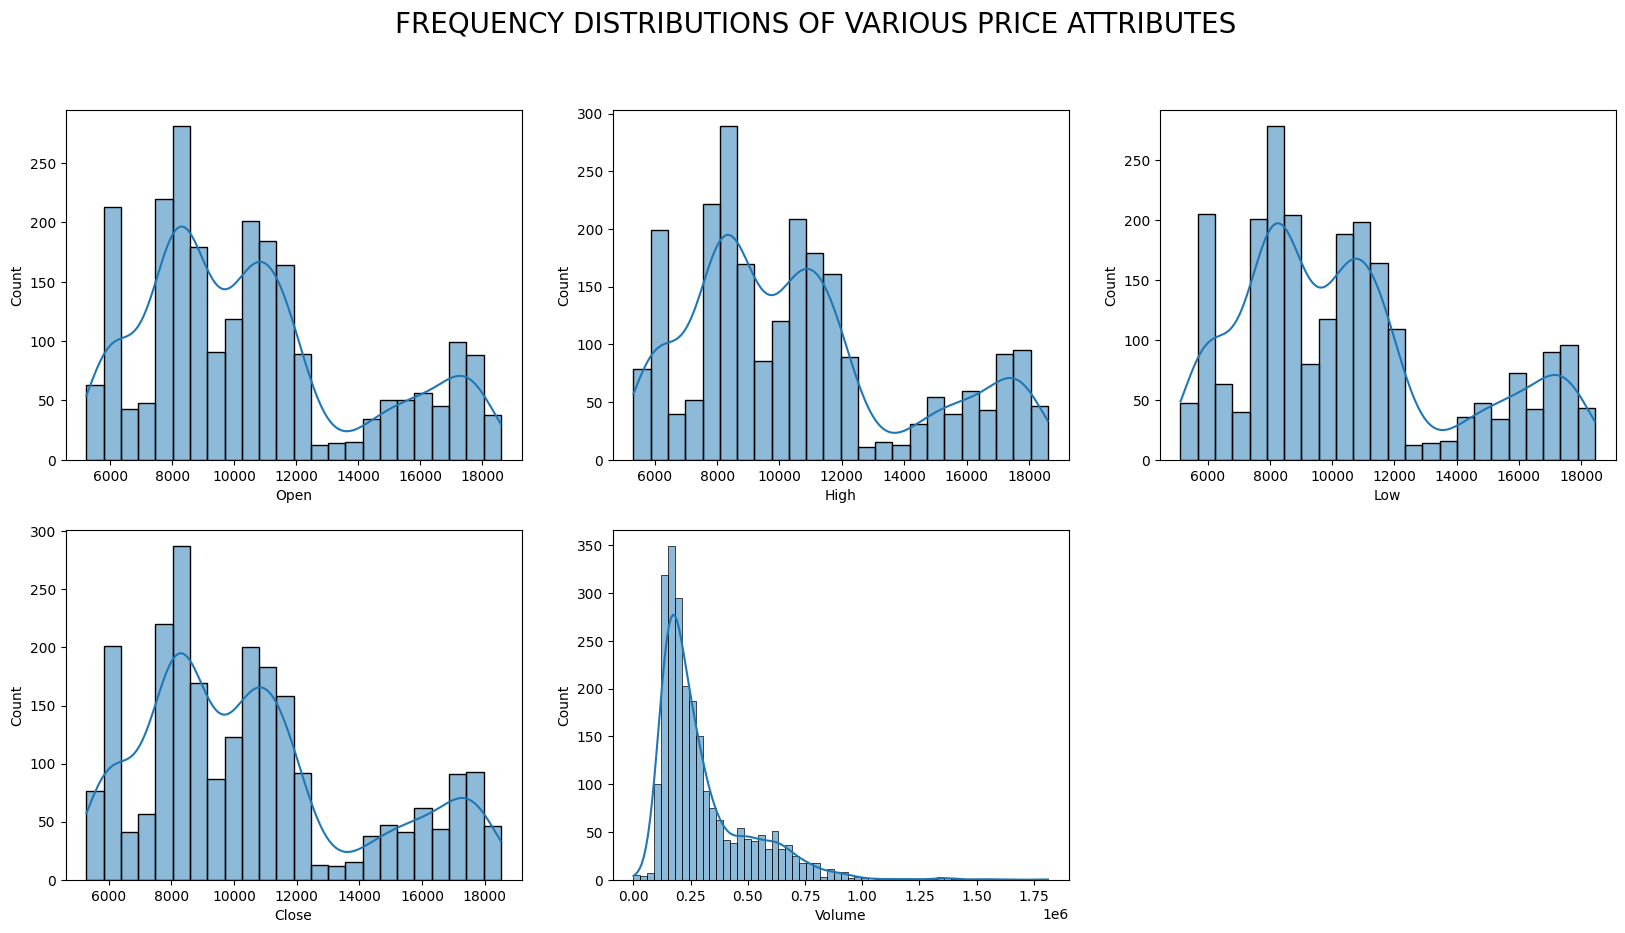

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    ax = plt.subplot(2, 3, i + 1)
    sb.histplot(nifty50[col], kde=True)  # Use histplot instead of distplot

# Set a common title for all subplots
plt.suptitle("FREQUENCY DISTRIBUTIONS OF VARIOUS PRICE ATTRIBUTES", fontsize=20)

# Display all subplots together
plt.show()


Observations
1. More times the stock opened, closed, high & lowed around 8000, 6000, 11000.
2. This can mean low volatility but outlier analysis must be done.
3. It can show support or resistance levels.

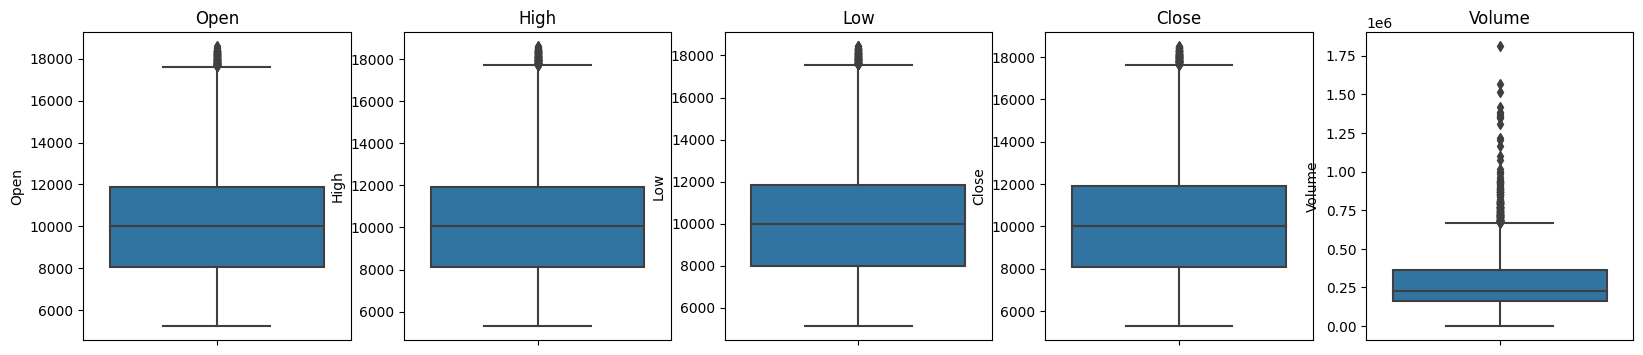

In [19]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 4))  # Adjust the figsize to match the number of features

for i, col in enumerate(features):
    plt.subplot(1, 5, i + 1)  # Use a 1x5 grid for 5 features
    sb.boxplot(data=nifty50, y=col)  # Specify the data and y-axis (column)
    plt.title(col)  # Add a title to each subplot

plt.show()

# The outliers could actually be ignored since fluctuations are common in stock prices.

In [20]:
# Select the columns of interest
columns_of_interest = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create a DataFrame with only the selected columns
subset_df = nifty50[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

correlation_matrix


,Open,High,Low,Close,Volume
Open,1.000000,0.999844,0.999797,0.999632,0.346730
High,0.999844,1.000000,0.999725,0.999828,0.350539
Low,0.999797,0.999725,1.000000,0.999825,0.341093
Close,0.999632,0.999828,0.999825,1.000000,0.345862
Volume,0.346730,0.350539,0.341093,0.345862,1.000000


Since we have found that all the OHLC data are positively correlated with each other, we can employ dimensionality reduction during model training. This will help us later in training & testing our model.

In [21]:
nifty50

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_100,EMA_50,EMA_100,SMA_20,std_20,Upper_Band,Lower_Band,Year,Month,Day,Quarter End
0,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0,NaN,NaN,6082.299805,6082.299805,NaN,NaN,NaN,NaN,2013,1,21,0
1,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0,NaN,NaN,6080.974322,6081.630502,NaN,NaN,NaN,NaN,2013,1,22,0
2,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0,NaN,NaN,6079.928263,6081.089300,NaN,NaN,NaN,NaN,2013,1,23,0
3,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0,NaN,NaN,6077.552649,6079.866742,NaN,NaN,NaN,NaN,2013,1,24,0
4,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0,NaN,NaN,6077.438815,6079.763438,NaN,NaN,NaN,NaN,2013,1,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800.0,17675.586992,17268.037471,17743.018795,17438.644271,18079.442481,258.481641,18596.405762,17562.479200,2022,11,21,0
2392,2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0,17684.495977,17293.486963,17762.672929,17454.595854,18112.837403,231.826978,18576.491359,17649.183446,2022,11,22,0
2393,2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0,17693.173984,17317.838965,17782.460265,17470.688016,18139.662402,215.771817,18571.206036,17708.118769,2022,11,23,0
2394,2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0,17704.128984,17344.177959,17809.975534,17490.755572,18181.049902,196.733762,18574.517427,17787.582378,2022,11,24,0


# MODEL

# Training & Validation

In [50]:
'''
1. Training
The train dataset is split into two, X & Y. X contains all the input data values, in our case
it's only Open. The model looks for patterns in X. Y contains the end goal i.e the data to be predicted. 
It tries to learn using X & Y and create a model using .fit().  

2. Testing
After creating our model, we now can test it or we can right away feed data and get predictions. 
For testing, we input X & Y variable into our model & it'll tell us how well the model predicted our 
output Y by comparing it with our input Y. 

'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract the 'Open' column as a Series
open_column = nifty50['Open']

# Create a new DataFrame with the 'Open' column
reshaped_df = pd.DataFrame(open_column, columns=['Open'])

#Selecting the features/columns/input variable i.e X variable for our model
features = reshaped_df

#Selecting target variable Y
target = nifty50['Close']


# test_size - Feeding 80% data for training & 20% data for testing
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2022)

print('Training Dataset Shape = {0} \n Validation Dataset Shape = {1}'.format(X_train.shape, X_test.shape))
#Here, X's are features/columns/input used for training and Y's are expected outcomes or Ouput

Training Dataset Shape = (1916, 1) 
 Validation Dataset Shape = (480, 1)


In [51]:
model = LinearRegression()
model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(Y_test, Y_pred)

print("Root Mean Squared Error (RMSE):",rmse)
print("R-squared (R2):",r2)


Root Mean Squared Error (RMSE): 102.08675853364109
R-squared (R2): 0.9991970531220575


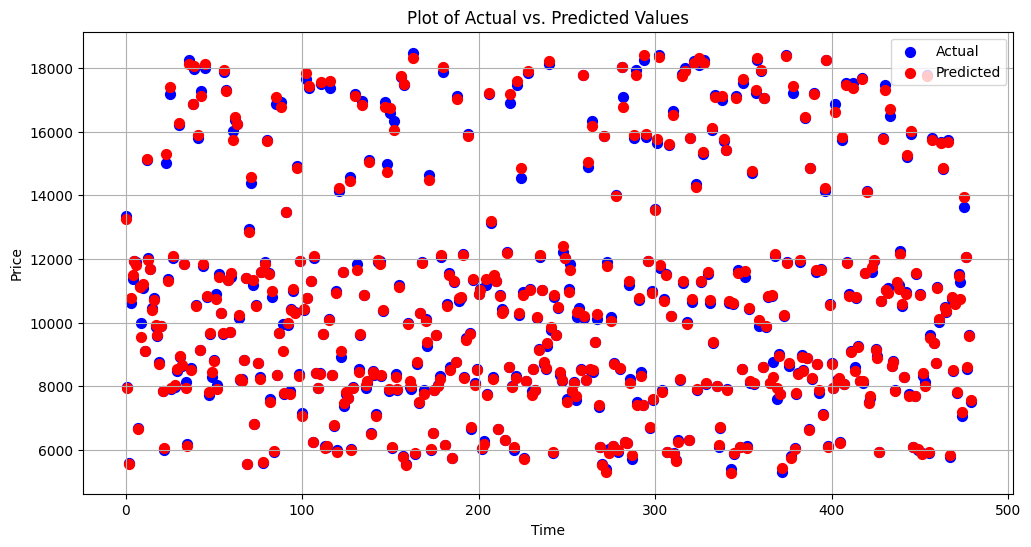

In [53]:
import matplotlib.pyplot as plt

# Assuming you have timestamps associated with your time series data
timestamps = range(len(Y_test2))

plt.figure(figsize=(12, 6))
plt.scatter(timestamps, Y_test2, label="Actual", color='blue', marker='o', s=50)
plt.scatter(timestamps, Y_pred2, label="Predicted", color='red', marker='o', s=50)

plt.title("Plot of Actual vs. Predicted Values")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

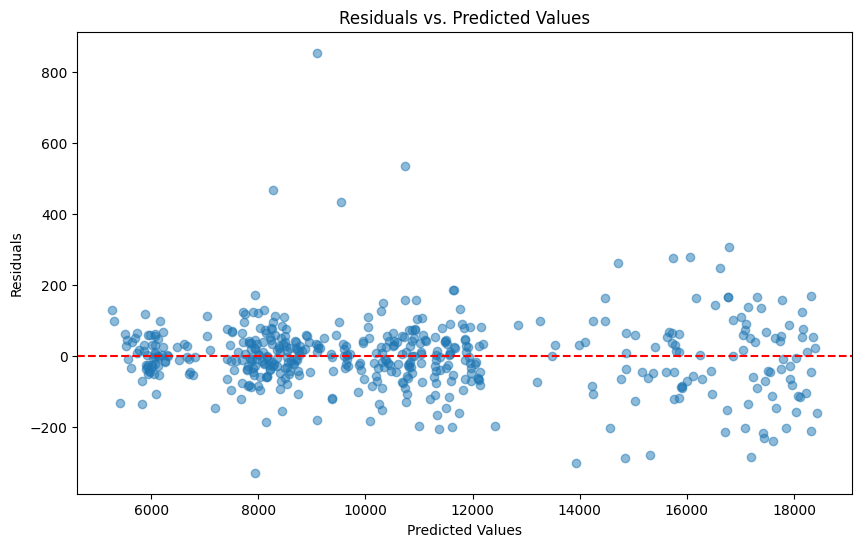

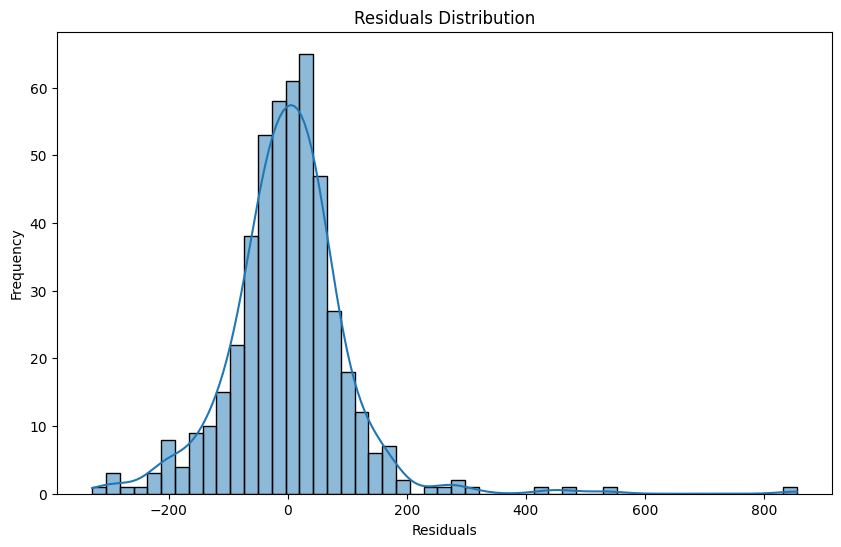

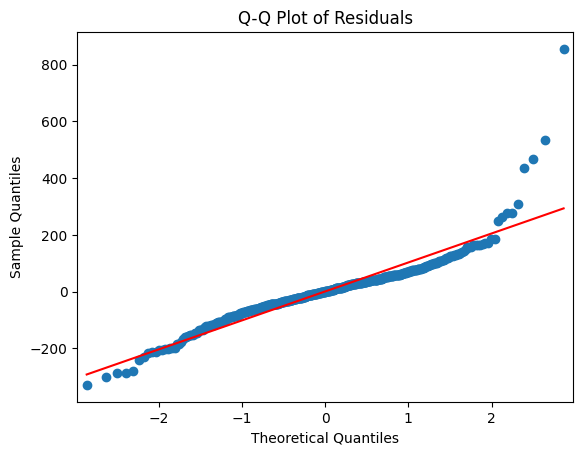

Residual Mean: 0.7418
Residual Standard Deviation: 102.0841


In [54]:
# Calculate the residuals (differences between observed and predicted values)
residuals = Y_test - Y_pred

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Create a histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
sb.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a Q-Q plot to assess normality visually
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Calculate and display summary statistics of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print(f"Residual Mean: {residual_mean:.4f}")
print(f"Residual Standard Deviation: {residual_std:.4f}")

1. We calculate the residuals by subtracting the predicted values (y_pred) from the actual values (y_test).

2. The scatter plot of residuals against predicted values should be randomly scattered around the horizontal line y=0. Since, Residual mean is near to zero, our model is good.

3. Histogram of residuals to visualize their distribution. Here, we can see a normal distribution which is good since, Normality is an important assumption in linear regression, so the histogram should resemble a normal distribution.

4. Q-Q plot is required to assess normality visually. The points on the Q-Q plot should approximately follow a straight line and it does!


In [52]:
# Let's check the data for the next day (29-11-22)
custom_data = pd.DataFrame({'Open': [18552.45]})

custom_close_prediction = model.predict(custom_data)

print("Predicted Close Value:", custom_close_prediction[0])
print('Actual Close Value: 18618.05')

Predicted Close Value: 18540.408417729763
Actual Close Value: 18618.05
